In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import cm

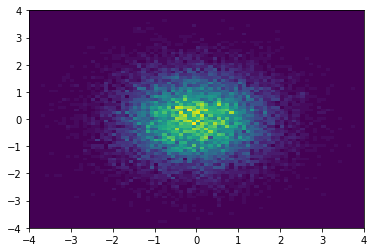

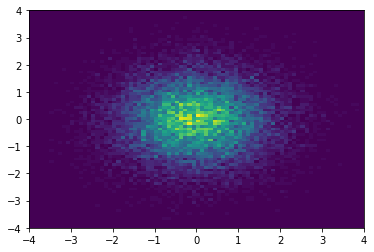

In [2]:
data1 = np.random.normal(size=(20000, 2))
data2 = np.random.normal(size=(20000, 2))

plt.hist2d(data1[:,0], data1[:,1], bins=[np.linspace(-4., 4., 81), np.linspace(-4, 4, 81)])
plt.show()

plt.hist2d(data2[:,0], data2[:,1], bins=[np.linspace(-4., 4., 81), np.linspace(-4, 4, 81)])
plt.show()

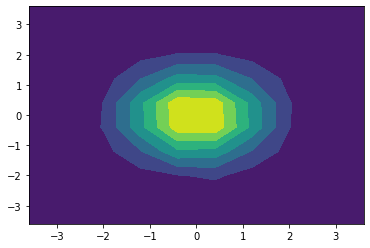

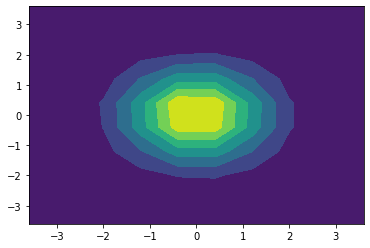

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


0.0 6.0


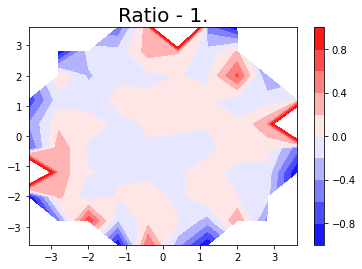

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


-2.0 2.208630521496931


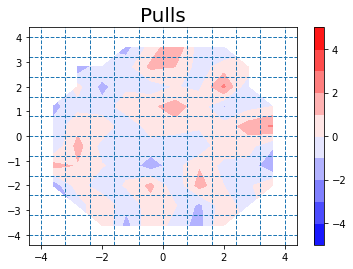

In [3]:
def assert_good_bins_format (bins) :
    assert len(bins) > 1
    assert bins[0] != bins[1]
    do_ascending = True if bins[1] > bins[0] else False
    last_bin = bins[0]
    for b in bins[1:] :
        if do_ascending :
            assert b > last_bin
        else :
            assert b < last_bin
        last_bin = b
    return True

def bin_data_2D (data_x, data_y, bins_x, bins_y, weights=None) :
    if type(bins_x)  == int : bins_x = np.linspace(np.min(data_x), np.max(data_x), bins_x+1)
    if type(bins_y)  == int : bins_y = np.linspace(np.min(data_y), np.max(data_y), bins_y+1)
    if type(data_x)  != np.ndarray : data_x = np.array(data_x)
    if type(data_y)  != np.ndarray : data_y = np.array(data_y)
    if type(weights) == type(None) : weights = np.ones(shape=data_x.shape)
    assert len(data_x) == len(data_y)
    assert len(data_x) == len(weights)
    assert_good_bins_format(bins_x)
    assert_good_bins_format(bins_y)
    X, Y, Z, EZ = [], [], [], []
    bin_lo_edge_x = bins_x[0]
    for bin_hi_edge_x in bins_x[1:] :
        col_X, col_Y, col_Z, col_EZ = [], [], [], []
        vec_y_w = [(y, w) for x, y, w in zip(data_x, data_y, weights) if (x>bin_lo_edge_x) and (x<bin_hi_edge_x)]
        bin_lo_edge_y = bins_y[0]
        for bin_hi_edge_y in bins_y[1:] :
            z  = np.sum([w for (y,w) in vec_y_w if (y>bin_lo_edge_y) and (y<bin_hi_edge_y)])
            ez = np.sqrt(np.sum([w*w for (y,w) in vec_y_w if (y>bin_lo_edge_y) and (y<bin_hi_edge_y)]))
            col_Z .append(z)
            col_EZ.append(ez)
            col_X .append(0.5*(bin_lo_edge_x+bin_hi_edge_x))
            col_Y .append(0.5*(bin_lo_edge_y+bin_hi_edge_y))
            bin_lo_edge_y = bin_hi_edge_y
        X .append(col_X)
        Y .append(col_Y)
        Z .append(col_Z)
        EZ.append(col_EZ)
        bin_lo_edge_x = bin_hi_edge_x
    return np.array(X), np.array(Y), np.array(Z), np.array(EZ)

def get_ratio_2D (data_x1, data_y1, data_x2, data_y2, bins_x, bins_y, weights=None) :
    X, Y, Z1, EZ1 = bin_data_2D(data_x1, data_y1, bins_x, bins_y, weights)
    X, Y, Z2, EZ2 = bin_data_2D(data_x2, data_y2, bins_x, bins_y, weights)
    frac_EZ1 = EZ1 / Z1
    frac_EZ2 = EZ2 / Z2
    ratio     = Z2 / Z1
    ratio_err = ratio * np.sqrt(frac_EZ1*frac_EZ1 + frac_EZ2*frac_EZ2)
    return X, Y, ratio, ratio_err

def get_pull_2D (data_x1, data_y1, data_x2, data_y2, bins_x, bins_y, weights=None) :
    X, Y, Z1, EZ1 = bin_data_2D(data_x1, data_y1, bins_x, bins_y, weights)
    X, Y, Z2, EZ2 = bin_data_2D(data_x2, data_y2, bins_x, bins_y, weights)
    num = Z2 - Z1
    den = np.sqrt(EZ1*EZ1 + EZ2*EZ2)
    return X, Y, num/den
    
data_x, data_y, data_z, data_ez = bin_data_2D(data1[:,0], data1[:,1], np.linspace(-4, 4, 11), np.linspace(-4, 4, 11))
plt.contourf(data_x, data_y, data_z)
plt.show()
                                
data_x, data_y, data_z, data_ez = bin_data_2D(data2[:,0], data2[:,1], np.linspace(-4, 4, 11), np.linspace(-4, 4, 11))
plt.contourf(data_x, data_y, data_z)
plt.show()
                                
data_x, data_y, data_z, data_ez = get_ratio_2D(data1[:,0], data1[:,1], data2[:,0], data2[:,1], np.linspace(-4, 4, 11), np.linspace(-4, 4, 11))
print(np.nanmin(data_z[data_z != -np.inf]), np.nanmax(data_z[data_z != np.inf]))
cf = plt.contourf(data_x, data_y, data_z-1., levels=[-1, -0.8, -0.6, -0.4, -0.2, 0., 0.2, 0.4, 0.6, 0.8, 1.], cmap="bwr")
plt.colorbar(cf)
plt.title("Ratio - 1.", fontsize=20)
plt.show()
                                
data_x, data_y, pulls = get_pull_2D(data1[:,0], data1[:,1], data2[:,0], data2[:,1], np.linspace(-4, 4, 11), np.linspace(-4, 4, 11))
print(np.nanmin(pulls), np.nanmax(pulls))
cf = plt.contourf(data_x, data_y, pulls, levels=[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], cmap="bwr")
plt.colorbar(cf)
plt.title("Pulls", fontsize=20)
for b in np.linspace(-4, 4, 11) :
    plt.axhline(b, linewidth=1, linestyle="--")
    plt.axvline(b, linewidth=1, linestyle="--")
plt.show()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


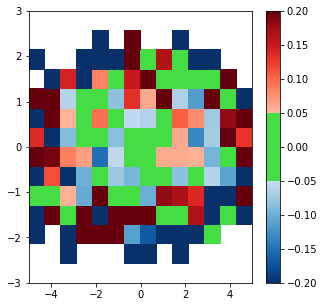

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


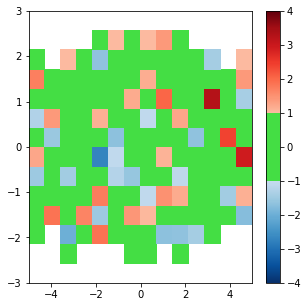

In [36]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math

def bin_data_2D (data_x, data_y, bins_x, bins_y, weights=None, normed=True) :
    if type(bins_x)  == int : bins_x = np.linspace(np.min(data_x), np.max(data_x), bins_x+1)
    if type(bins_y)  == int : bins_y = np.linspace(np.min(data_y), np.max(data_y), bins_y+1)
    if type(data_x)  != np.ndarray : data_x = np.array(data_x)
    if type(data_y)  != np.ndarray : data_y = np.array(data_y)
    if type(weights) == type(None) : weights = np.ones(shape=data_x.shape)
    if normed : weights = weights / np.sum(weights)
    assert len(data_x) == len(data_y)
    assert len(data_x) == len(weights)
    assert_good_bins_format(bins_x)
    assert_good_bins_format(bins_y)
    Z , _, _ = np.histogram2d(data_x, data_y, bins=[bins_x, bins_y], weights=weights, density=False)
    EZ, _, _ = np.histogram2d(data_x, data_y, bins=[bins_x, bins_y], weights=weights*weights, density=False)
    EZ = np.sqrt(EZ)
    return bins_x, bins_y, Z, EZ

def get_ratio_2D (data_x1, data_y1, data_x2, data_y2, bins_x, bins_y, weights1=None, weights2=None) :
    X, Y, Z1, EZ1 = bin_data_2D(data_x1, data_y1, bins_x, bins_y, weights1)
    X, Y, Z2, EZ2 = bin_data_2D(data_x2, data_y2, bins_x, bins_y, weights2)
    frac_EZ1 = EZ1 / Z1
    frac_EZ2 = EZ2 / Z2
    ratio     = Z2 / Z1
    ratio_err = ratio * np.sqrt(frac_EZ1*frac_EZ1 + frac_EZ2*frac_EZ2)
    return X, Y, ratio, ratio_err

def get_pull_2D (data_x1, data_y1, data_x2, data_y2, bins_x, bins_y, weights=None) :
    X, Y, Z1, EZ1 = bin_data_2D(data_x1, data_y1, bins_x, bins_y, weights)
    X, Y, Z2, EZ2 = bin_data_2D(data_x2, data_y2, bins_x, bins_y, weights)
    num = Z2 - Z1
    den = np.sqrt(EZ1*EZ1 + EZ2*EZ2)
    return X, Y, num/den

bins_x, bins_y = np.linspace(-5, 5, 15), np.linspace(-3, 3, 15)

weights1 = np.ones(shape=(len(data1),))
weights2 = np.ones(shape=(len(data2),))

weights1 = weights1/np.sum(weights1)
weights2 = weights2/np.sum(weights2)

_, _, z1, e_z1 = bin_data_2D(data1[:,0], data1[:,1], bins_x, bins_y, weights=weights1)
_, _, z2, e_z2 = bin_data_2D(data2[:,0], data2[:,1], bins_x, bins_y, weights=weights2)

top    = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('Reds', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))))
newcolors [math.ceil(258*3/8)-1:math.floor(258*5/8)-1] = np.array([68/256, 223/256, 68/256, 1])
newcmp   = ListedColormap(newcolors, name='BlueToRed')


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(bins_x, bins_y, (z2/z1)-1, cmap=newcmp, vmin=-0.2, vmax=0.2)
plt.colorbar(im)
plt.show()


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
im = ax.pcolormesh(bins_x, bins_y, (z2-z1)/np.sqrt(e_z1*e_z1+e_z2*e_z2), cmap=newcmp, vmin=-4, vmax=4)
plt.colorbar(im)
plt.show()


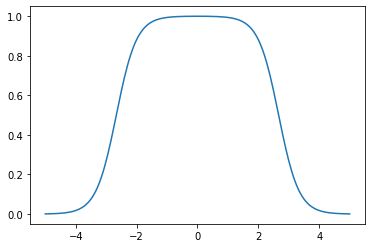

In [46]:
x = np.linspace(-5, 5, 201)
alpha = 3
beta  = 2
gamma = 2
y = 1. / (1 + np.exp((x-beta)*alpha - gamma)) / (1 + np.exp(-(x+beta)*alpha - gamma))

plt.plot(x, y)